In [160]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.interpolate import make_interp_spline, BSpline


# Draw flat mom comparsion pic

In [22]:
no_mom   = torch.load('buffer/CIFAR100/ConvNet/replay_buffer_4.pt')
mom      = torch.load('buffer_instancenorm/CIFAR100_NO_ZCA/ConvNet/replay_buffer_0.pt')
flat_mom = torch.load('buffer_flat2/CIFAR100_NO_ZCA/ConvNet/replay_buffer_0.pt')

In [3]:
def distance(buffer, num):
    res = []
    trajectory = buffer[num]
    start = trajectory[0]
    start_params = torch.cat([p.data.reshape(-1) for p in start], 0)
    for i in range(1,len(trajectory)):
        next_params = torch.cat([p.data.reshape(-1) for p in trajectory[i]], 0)
        param_dist = torch.nn.functional.mse_loss(start_params, next_params, reduction="sum")
        res.append(param_dist)
        start_params = next_params
    return res

In [165]:
no_mom_res = distance(no_mom, 0)
mom_res    = distance(mom,0)
flat_res   = distance(flat_mom,1)

flat_acc   = [0.1073,0.1511,0.1978,0.2353,0.2552,0.2914,0.3101,0.327,0.3463,0.3545,0.3726,0.3795,0.3968,0.4142,0.429,0.43,0.4338,0.4497,0.4611,0.467,0.4746,0.4746,0.4726,0.4778,0.4865,0.491,0.4958,0.5086,0.5036,0.5041,0.5094,0.5098,0.5157,0.5194,0.5206,0.5182,0.524,0.5262,0.5205,0.5264,0.5336,0.5284,0.5315,0.5337,0.5353,0.5347,0.5348,0.5307,0.5356,0.5419]

mom_acc    = [0.2918,0.3637,0.4066,0.4237,0.4612,0.4706,0.4919,0.492,0.5078,0.5159,0.5139,0.5302,0.5362,0.5335,0.5408,0.5418,0.5415,0.5427,0.5586,0.5508,0.5476,0.5612,0.558,0.5633,0.5642,0.5524,0.5586,0.5495,0.5607,0.5647,0.5651,0.5674,0.5543,0.5626,0.5704,0.5713,0.5583,0.5723,0.5652,0.5597,0.5699,0.5756,0.5676,0.5727,0.5703,0.5728,0.5758,0.5651,0.5745,0.5638]

no_mom_acc = [0.0891,0.1269,0.1538,0.1806,0.2015,0.2303,0.2463,0.2665,0.2822,0.295,0.3022,0.3122,0.327,0.3371,0.3364,0.3533,0.3582,0.3675,0.3759,0.3796,0.3816,0.3952,0.3983,0.3854,0.3989,0.4166,0.4183,0.4269,0.4199,0.4281,0.4412,0.436,0.4422,0.4469,0.4506,0.4608,0.4592,0.4618,0.4638,0.4672,0.4552,0.4688,0.4434,0.4751,0.4701,0.4794,0.4672,0.4871,0.477,0.4758]

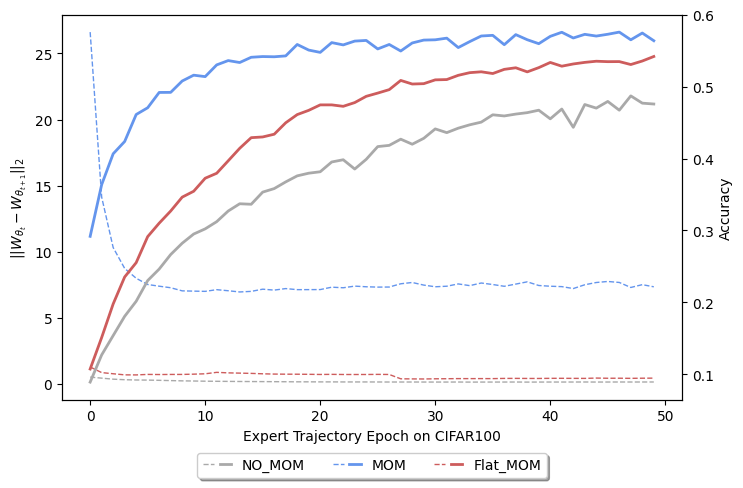

In [172]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

plt.style.use('seaborn-v0_8-colorblind')
fig, axis = plt.subplots(1,1,figsize=(8,5))

# x=np.linspace(0,49,50)
# B_spline_coeff = make_interp_spline(x, no_mom_acc,k=1)
# X_ = np.linspace(x.min(), x.max(), 500)
# no_mom_acc_ = B_spline_coeff(X_)

lns1,=axis.plot(no_mom_res, label='NO_MOM',linestyle='--',linewidth=1,c='darkgrey')
lns2,=axis.plot(mom_res, label='MOM',linestyle='--',linewidth=1,c='cornflowerblue')
lns3,=axis.plot(flat_res, label='Flat_MOM',linestyle='--',linewidth=1,c='indianred')
axis.set_xlabel('Expert Trajectory Epoch on CIFAR100')
axis.set_ylabel('$||W_{\\theta_t}-W_{\\theta_{t+1}}||_2$')

axis2 = axis.twinx()
lns4,=axis2.plot(no_mom_acc, label='NO_MOM',c='darkgrey',linewidth=2)
lns5,=axis2.plot(mom_acc, label='MOM',c='cornflowerblue',linewidth=2)
lns6,=axis2.plot(flat_acc, label='Flat_MOM',c='indianred',linewidth=2)
axis2.set_ylabel('Accuracy')

axis.legend([(lns1,lns4),(lns2,lns5),(lns3,lns6),], ['NO_MOM','MOM','Flat_MOM'],numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)}, 
            loc='upper center',bbox_to_anchor=(0.5, -0.12), fancybox=True, shadow=True, ncol=5)
fig.savefig('flat_show.pdf',bbox_inches='tight')

# 2